In [303]:
!pip install -r requirements.txt

In [304]:
%load_ext jupyter_black

The jupyter_black extension is already loaded. To reload it, use:
  %reload_ext jupyter_black


In [305]:
import numpy as np
import pandas as pd
import opendatasets as od
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import math

## Context

Cardiovascular diseases (CVDs) are the leading cause of death globally, claiming 17.9 million lives annually (31% of all deaths). Four out of five CVD deaths are due to heart attacks and strokes, with one-third occurring in people under 70. Early detection and management of CVDs, especially for those with risk factors like hypertension, diabetes, or hyperlipidaemia, can significantly reduce mortality. Machine learning models can aid in early diagnosis and prediction of heart diseases.

---

### Attributes

- Age: Patient's age (years).
- Sex: [M: Male, F: Female].
- ChestPainType: Chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic].
- RestingBP: Resting blood pressure (mm Hg).
- Cholesterol: Serum cholesterol (mg/dL).
- FastingBS: Fasting blood sugar [1: >120 mg/dL, 0: otherwise].
- RestingECG: ECG results [Normal, ST, LVH].
- MaxHR: Max heart rate achieved (60–202).
- ExerciseAngina: Exercise-induced angina [Y: Yes, N: No].
- Oldpeak: ST depression (numeric).
- ST_Slope: Slope of peak ST segment [Up, Flat, Down].
- HeartDisease: Diagnosis [1: Heart disease, 0: Normal].

---

### Source

This dataset combines 5 heart datasets with 11 common features, making it the largest heart disease dataset available. The datasets are:
1. Cleveland: 303 observations.
2. Hungarian: 294 observations.
3. Switzerland: 123 observations.
4. Long Beach VA: 200 observations.
5. Stalog: 270 observations.

# 0 Data download

In [306]:
link = "https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction"
od.download(link)

df = pd.read_csv("heart-failure-prediction/heart.csv")
df.head(5)

Skipping, found downloaded files in ".\heart-failure-prediction" (use force=True to force download)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [307]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [308]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


# 1 Data analysis and preprocessing

Let's see what values ​​the attributes take

In [309]:
numerical_features = df.select_dtypes(include=["int64", "float64"]).columns.difference(
    ["HeartDisease"]
)
categorical_features = df.select_dtypes(include=["object"]).columns.tolist()
target = "HeartDisease"

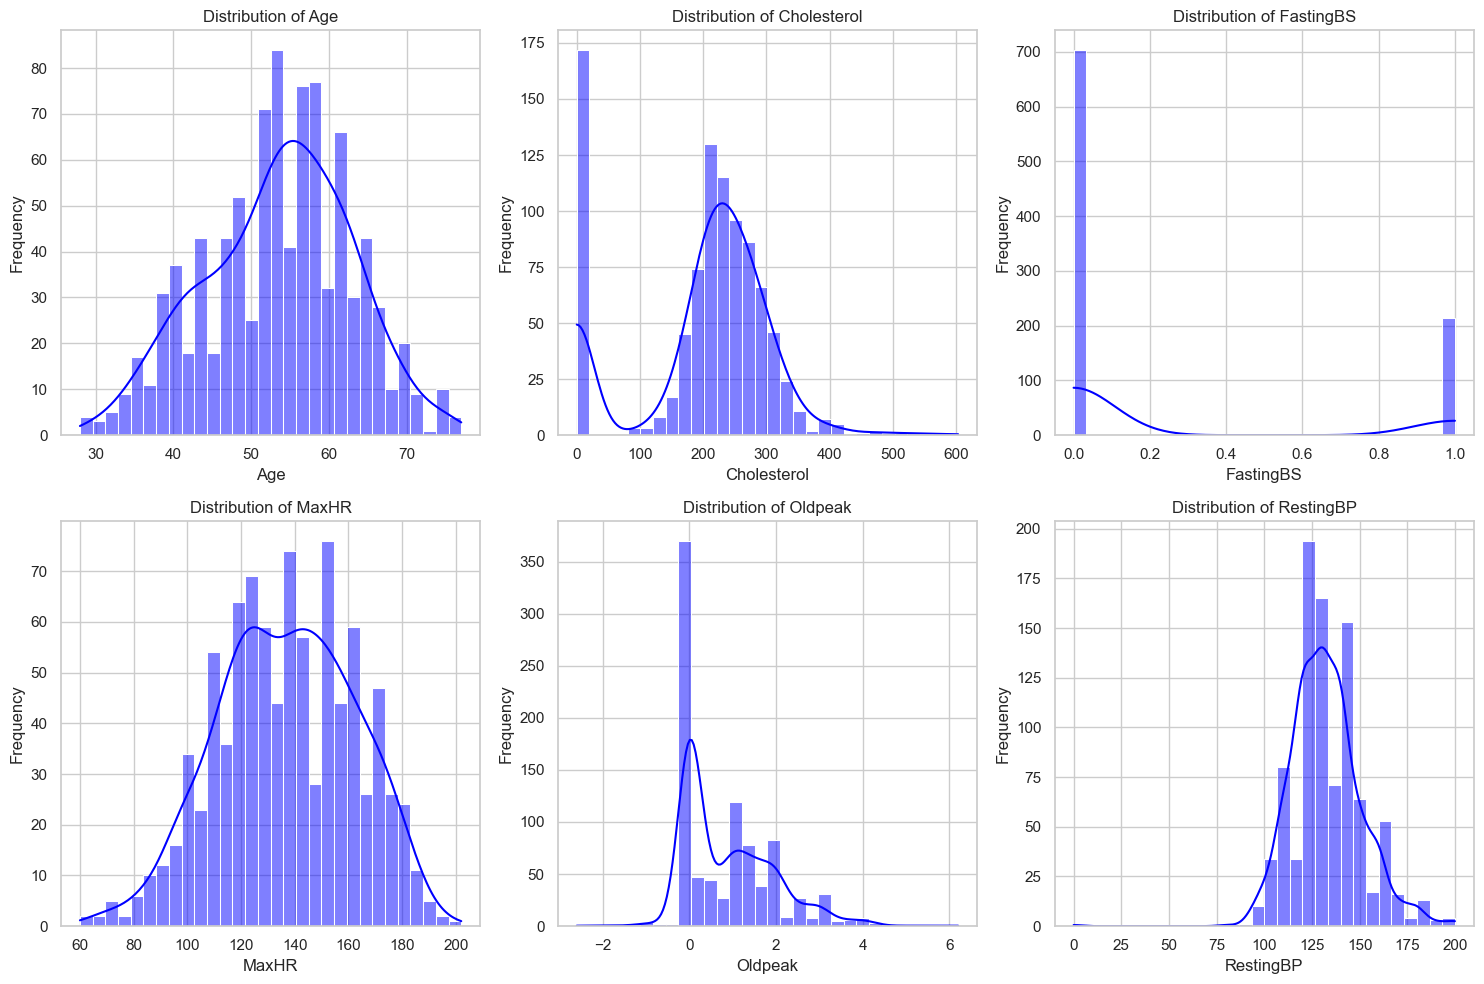

In [310]:
num_rows = math.ceil(len(numerical_features) / 3)
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
axes = axes.flatten()

for idx, feature in enumerate(numerical_features):
    sns.histplot(
        data=df,
        x=feature,
        bins=30,
        kde=True,
        color="blue",
        ax=axes[idx],
    )
    axes[idx].set_title(f"Distribution of {feature}")
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel("Frequency")

for i in range(len(numerical_features), len(axes)):
    axes[i].axis("off")

plt.tight_layout()
plt.show()

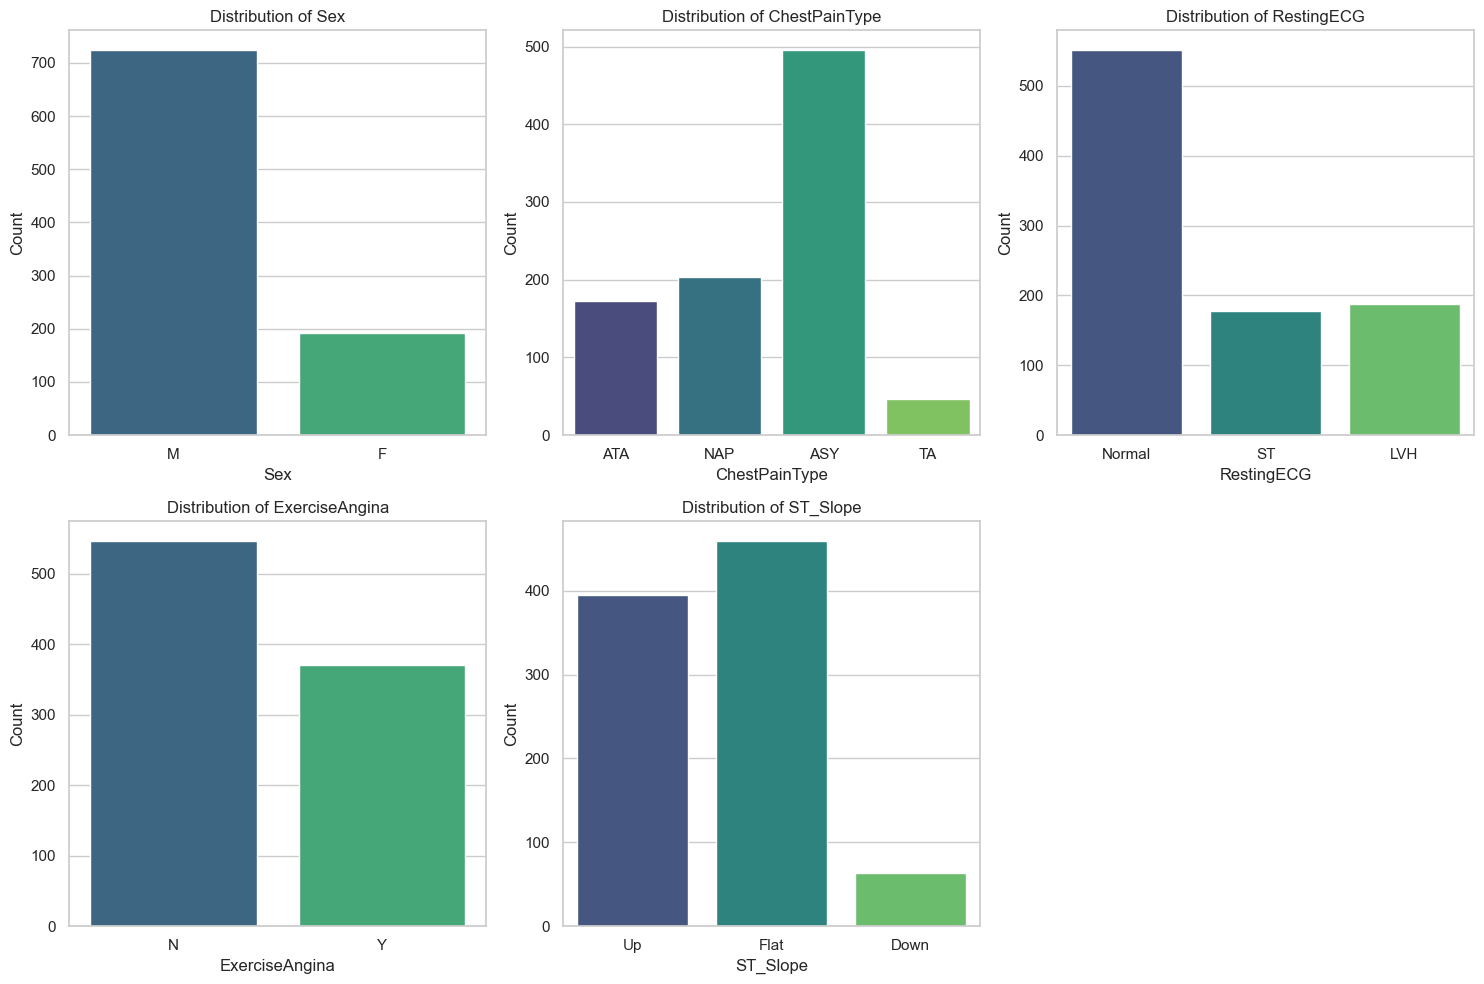

In [311]:
num_rows = math.ceil(len(categorical_features) / 3)
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
axes = axes.flatten()

for idx, feature in enumerate(categorical_features):
    sns.countplot(
        data=df, x=feature, hue=feature, palette="viridis", dodge=False, ax=axes[idx]
    )
    axes[idx].set_title(f"Distribution of {feature}")
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel("Count")

for i in range(len(categorical_features), len(axes)):
    axes[i].axis("off")

plt.tight_layout()
plt.show()

- **Sex**: Indicates biological sex, with two possible values (`Male`, `Female`).
- **FastingBS**: Indicates whether fasting blood sugar is greater than 120 mg/dL (`Yes`, `No`).
- **ExerciseAngina**: Indicates the presence of exercise-induced angina (`Yes`, `No`).

- **ChestPainType**: Describes the type of chest pain experienced, with categories such as `Typical Angina`, `Atypical Angina`, `Non-Anginal Pain`, and `Asymptomatic`.
- **RestingECG**: Represents results of a resting electrocardiogram, including categories like `Normal`, `ST-T Wave Abnormality`, and `Left Ventricular Hypertrophy`.
- **ST_Slope**: Indicates the slope of the peak exercise ST segment, categorized as `Upsloping`, `Flat`, or `Downsloping`.

- **Age**: Represents the age of individuals in the dataset, typically spanning a wide range, such as from early adulthood (e.g., 20 years) to older age (e.g., 80 years or more).
- **RestingBP**: Resting blood pressure, usually measured in mmHg, can vary broadly from low to high values, such as 70 mmHg to 200 mmHg.
- **Cholesterol**: Total serum cholesterol in mg/dL, ranging from low levels (e.g., 100 mg/dL) to high levels (e.g., 400 mg/dL or more).
- **MaxHR**: Maximum heart rate achieved during exercise, commonly ranging from 60 to 200 beats per minute.
- **Oldpeak**: Represents the ST depression induced by exercise relative to rest, typically taking values close to 0 (normal) or higher values indicating ischemia.

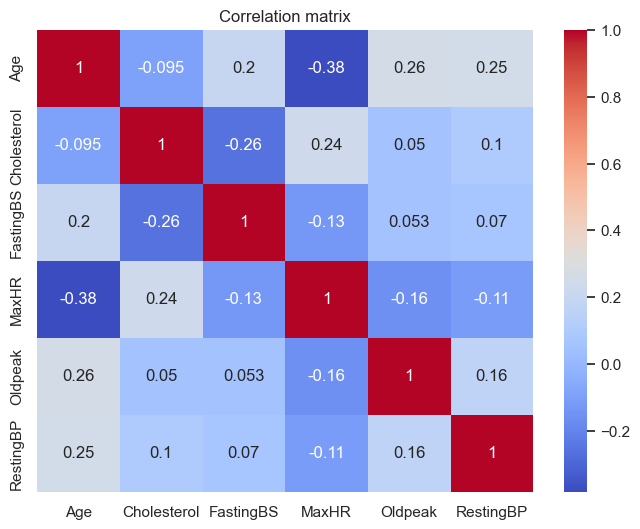

In [312]:
plt.figure(figsize=(8, 6))
corr_matrix = df[numerical_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation matrix")
plt.show()


remove outliers

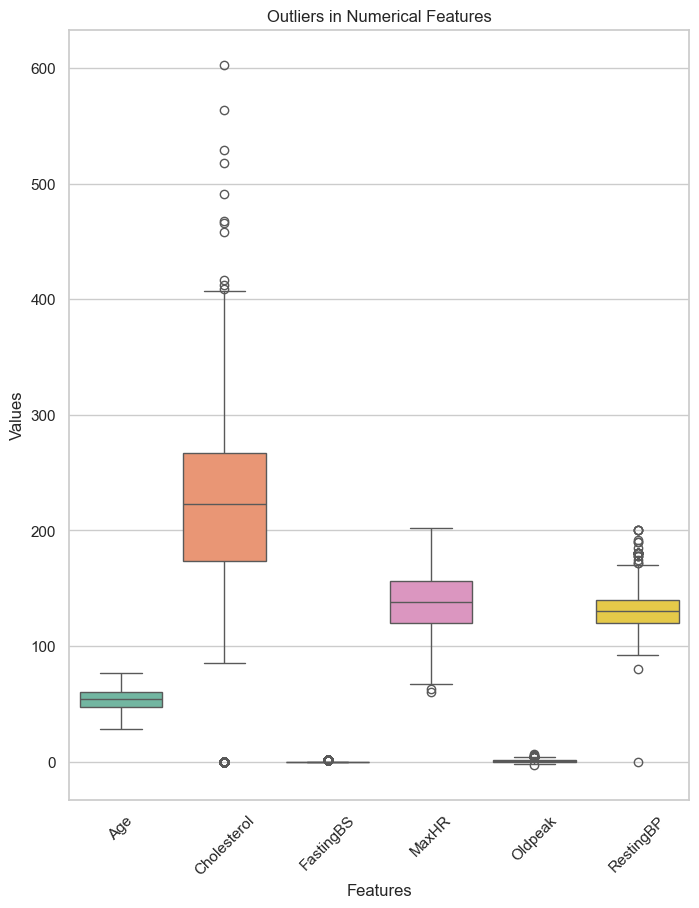

In [313]:
plt.figure(figsize=(8, 10))
sns.boxplot(data=df[numerical_features], palette="Set2")
plt.title("Outliers in Numerical Features")
plt.xlabel("Features")
plt.ylabel("Values")
plt.xticks(rotation=45)
plt.show()

In [314]:
numeric_df = df[numerical_features]

Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

numeric_df_clipped = numeric_df.clip(
    lower=lower_bound, upper=upper_bound, axis=1
).astype(int)

df.update(numeric_df_clipped)

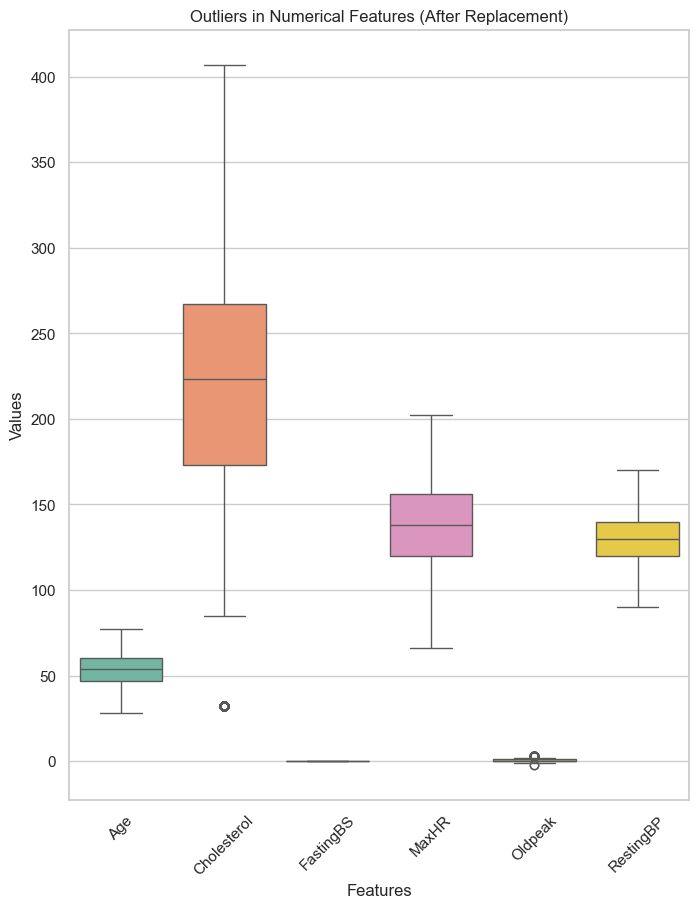

In [315]:
plt.figure(figsize=(8, 10))
sns.boxplot(data=df[numerical_features], palette="Set2")
plt.title("Outliers in Numerical Features (After Replacement)")
plt.xlabel("Features")
plt.ylabel("Values")
plt.xticks(rotation=45)
plt.show()

In [316]:
df.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.0,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# 2 Binarization

### Dichotomic Scale

The following features are represented by two unique values, making them suitable for a dichotomous scale. This approach converts these features into binary attributes:

- `Sex`: Biological sex (`Male`, `Female`).
- `FastingBS`: Fasting blood sugar > 120 mg/dL (`Yes`, `No`).
- `ExerciseAngina`: Exercise-induced angina (`Yes`, `No`).

---

### Nominal Scale

For features with more than two unique values, a nominal scale is used to binarize each category into separate attributes:

- `ChestPainType`: Type of chest pain experienced:
  - `Typical Angina`
  - `Atypical Angina`
  - `Non-Anginal Pain`
  - `Asymptomatic`
- `RestingECG`: Resting electrocardiogram results:
  - `Normal`
  - `ST-T Wave Abnormality`
  - `Left Ventricular Hypertrophy`
- `ST_Slope`: Slope of the peak exercise ST segment:
  - `Upsloping`
  - `Flat`
  - `Downsloping`

---

### Inter-Ordinal Scale

Numeric features are divided into intervals to retain clinically relevant information while simplifying analysis. The boundaries balance clinical thresholds with logical grouping.

- **Age**:  
  Critical for cardiovascular risk assessment. Younger groups use broader intervals due to lower risk, while older groups use narrower intervals to capture significant health variations.  
  - Boundaries: `20`, `35`, `50`, `60`, `70`, `85`

- **RestingBP**:  
  Normal range is 90–120 mmHg, while higher readings indicate elevated or hypertensive risk. Broader intervals are used for extremely high values.  
  - Boundaries: `80`, `100`, `120`, `140`, `160`, `200`

- **Cholesterol**:  
  Divided into standard clinical categories: normal (<200 mg/dL), borderline (200–239 mg/dL), and high (≥240 mg/dL). Additional ranges are added for very high values.  
  - Boundaries: `120`, `180`, `240`, `300`, `360`

- **MaxHR**:  
  Maximum heart rate decreases with age and varies by fitness. Segments emphasize clinically significant ranges.  
  - Boundaries: `50`, `100`, `140`, `180`

- **Oldpeak**:  
  Measures ST depression during exercise. Low values indicate no ischemia, while higher values suggest severe ischemia. Finer granularity is applied to low ranges, and broader intervals for high ranges.  
  - Boundaries: `0.5`, `1.5`, `2.5`, `4.0`

In [317]:
scales = ["ordinal", "categorical", "binary"]
features_by_scale = {
    "ordinal": ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"],
    "categorical": ["ChestPainType", "RestingECG", "ST_Slope"],
    "binary": ["Sex", "FastingBS", "ExerciseAngina"],
}
boundaries = {
    "Age": [20, 35, 50, 60, 70, 85],
    "RestingBP": [80, 100, 120, 140, 160, 200],
    "Cholesterol": [120, 180, 240, 300, 360],
    "MaxHR": [50, 100, 140, 180],
    "Oldpeak": [0.5, 1.5, 2.5, 4.0],
}


def binarize_data(input_df, features_by_scale, scales, boundaries):
    processed_df = input_df.copy()
    for scale in scales:
        for feature in features_by_scale[scale]:
            processed_df.drop(columns=feature, inplace=True)
            if scale == "ordinal":
                for boundary in boundaries[feature]:
                    processed_df[f"{feature}>={boundary}"] = (
                        input_df[feature] >= boundary
                    )
            elif scale in ["categorical", "binary"]:
                prefix = feature if scale == "binary" else ""
                prefix_separator = "_" if scale == "binary" else ""
                dummies = pd.get_dummies(
                    input_df[feature], prefix=prefix, prefix_sep=prefix_separator
                )
                processed_df = pd.concat([processed_df, dummies], axis=1)
    return processed_df


df_bin = binarize_data(df, features_by_scale, scales, boundaries)

In [318]:
columns_df = pd.DataFrame(df_bin.columns, columns=["Column Name"])
columns_df

,Column Name
0,HeartDisease
1,Age>=20
2,Age>=35
3,Age>=50
4,Age>=60
5,Age>=70
6,Age>=85
7,RestingBP>=80
8,RestingBP>=100
9,RestingBP>=120


In [319]:
y = df_bin.pop("HeartDisease")
X = df_bin
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=15
)